# Space X Falcon 9 First Stage Landing Prediction
### **EDA With Data Visualization**
![Falcon 9](../images/falcon9.webp)
### Objective:
* Exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('../csv/dataset_part_2.csv')
df.head(10)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1.0,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0003,-80.577366,28.561857,0
1,2.0,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0005,-80.577366,28.561857,0
2,3.0,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0007,-80.577366,28.561857,0
3,4.0,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1003,-120.610829,34.632093,0
4,5.0,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1004,-80.577366,28.561857,0
5,6.0,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1005,-80.577366,28.561857,0
6,7.0,2014-04-18,Falcon 9,2296.000000,ISS,CCSFS SLC 40,True Ocean,1.0,0.0,0.0,1.0,NaN,1.0,0.0,B1006,-80.577366,28.561857,1
7,8.0,2014-07-14,Falcon 9,1316.000000,LEO,CCSFS SLC 40,True Ocean,1.0,0.0,0.0,1.0,NaN,1.0,0.0,B1007,-80.577366,28.561857,1
8,9.0,2014-08-05,Falcon 9,4535.000000,GTO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1008,-80.577366,28.561857,0
9,10.0,2014-09-07,Falcon 9,4428.000000,GTO,CCSFS SLC 40,None None,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1011,-80.577366,28.561857,0


### 1. Launch Outcome.
**FlightNumber** (indicating the continuous launch attempts.)
               vs.
 **Payload**

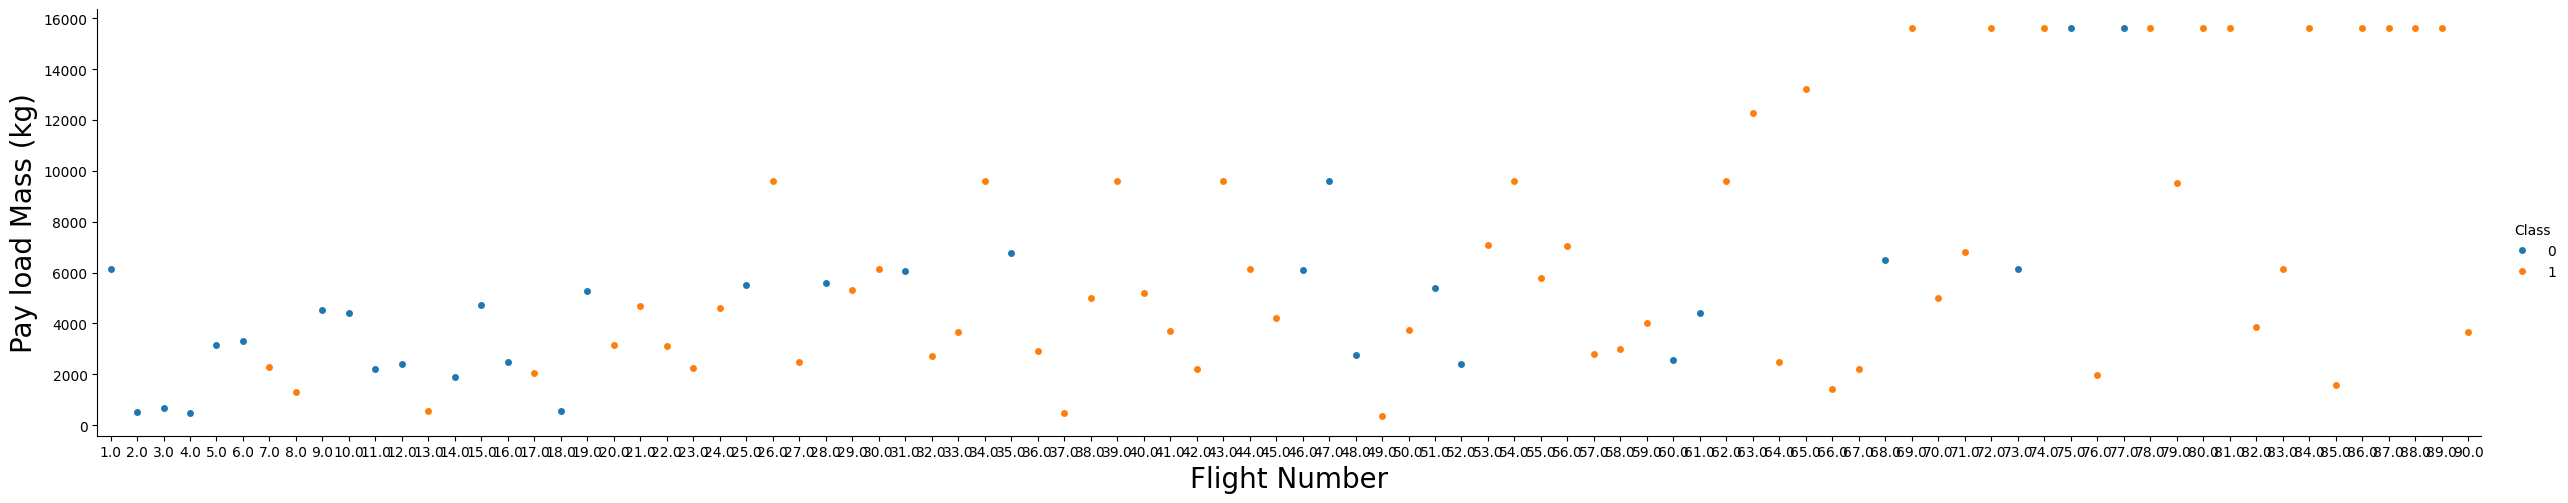

In [15]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

Different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

### 2. Relationship between Flight Number and Launch Site

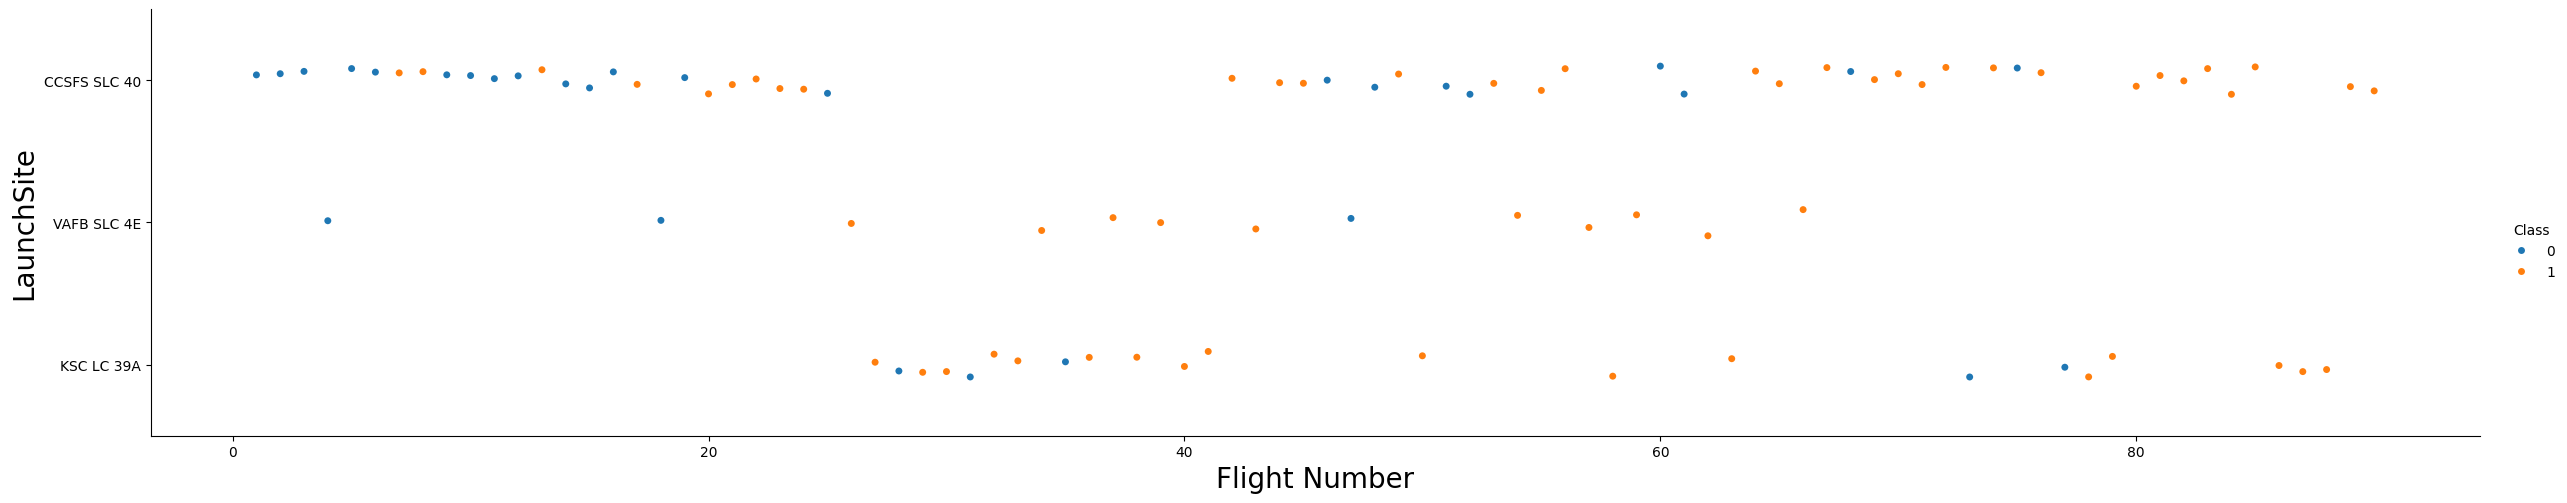

In [16]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()


### 3. Relationship between Payload and Launch Site

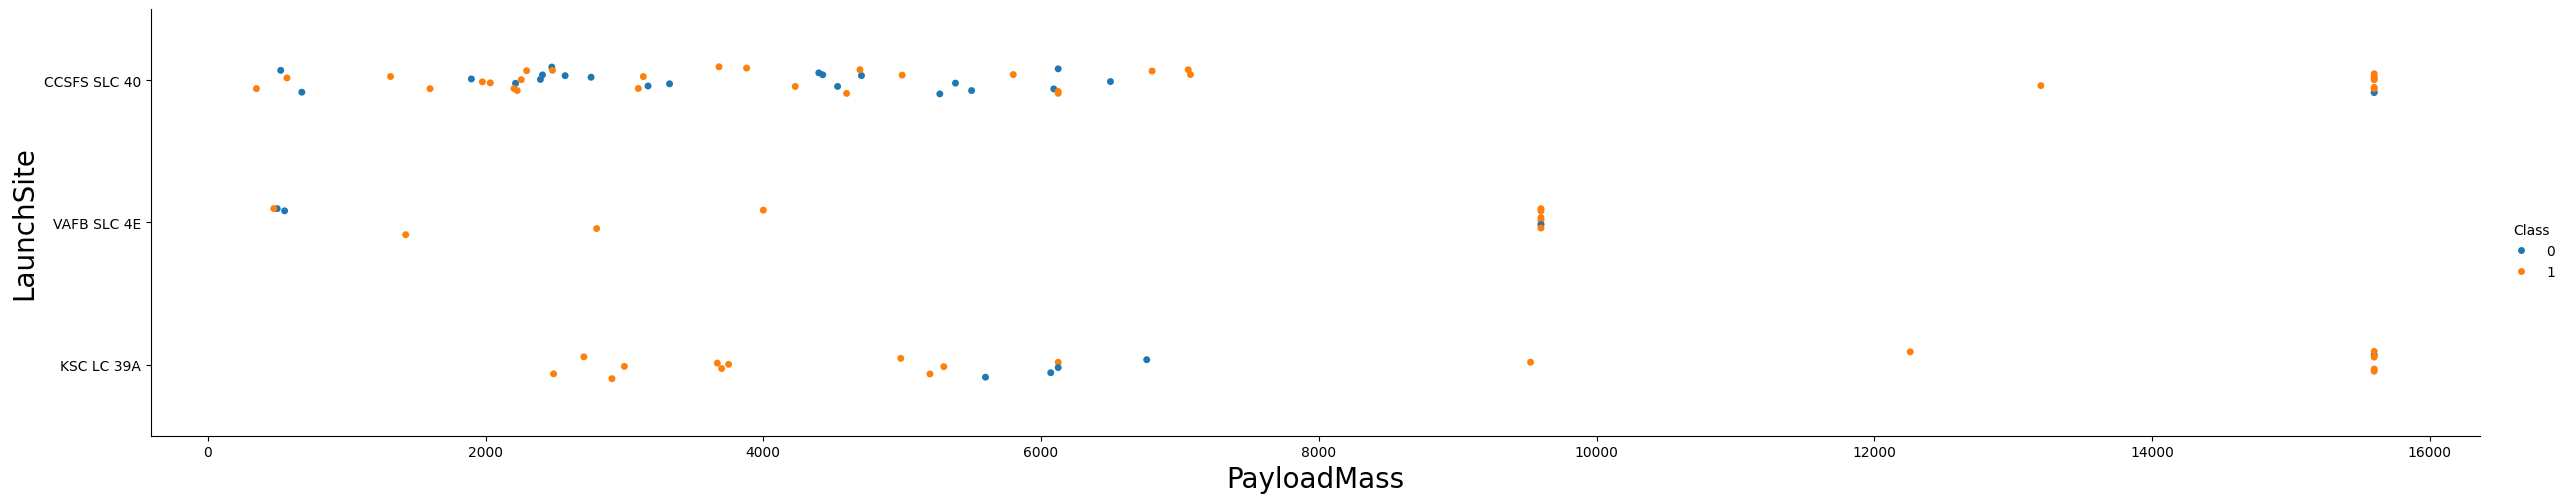

In [17]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("LaunchSite",fontsize=20)
plt.show()

Most launches with payload mass under 10,000 kg are from any launch site, but heavier ones happens mainly at CCAFS SLC 40 and KSC LC 39A

### 4. Relationship between success rate of each orbit type

<Axes: xlabel='Orbit'>

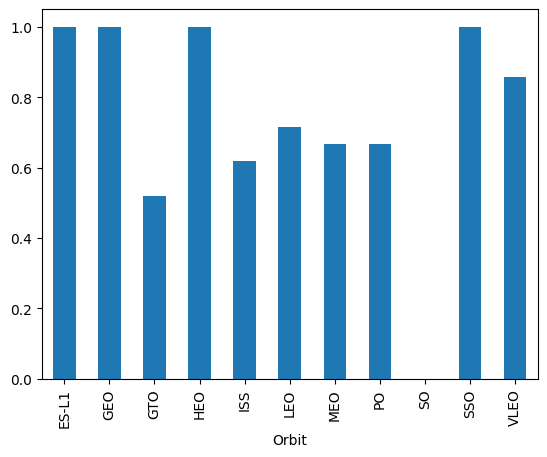

In [18]:
df.groupby('Orbit')['Class'].mean().plot.bar()

### 5. relationship between FlightNumber and Orbit type

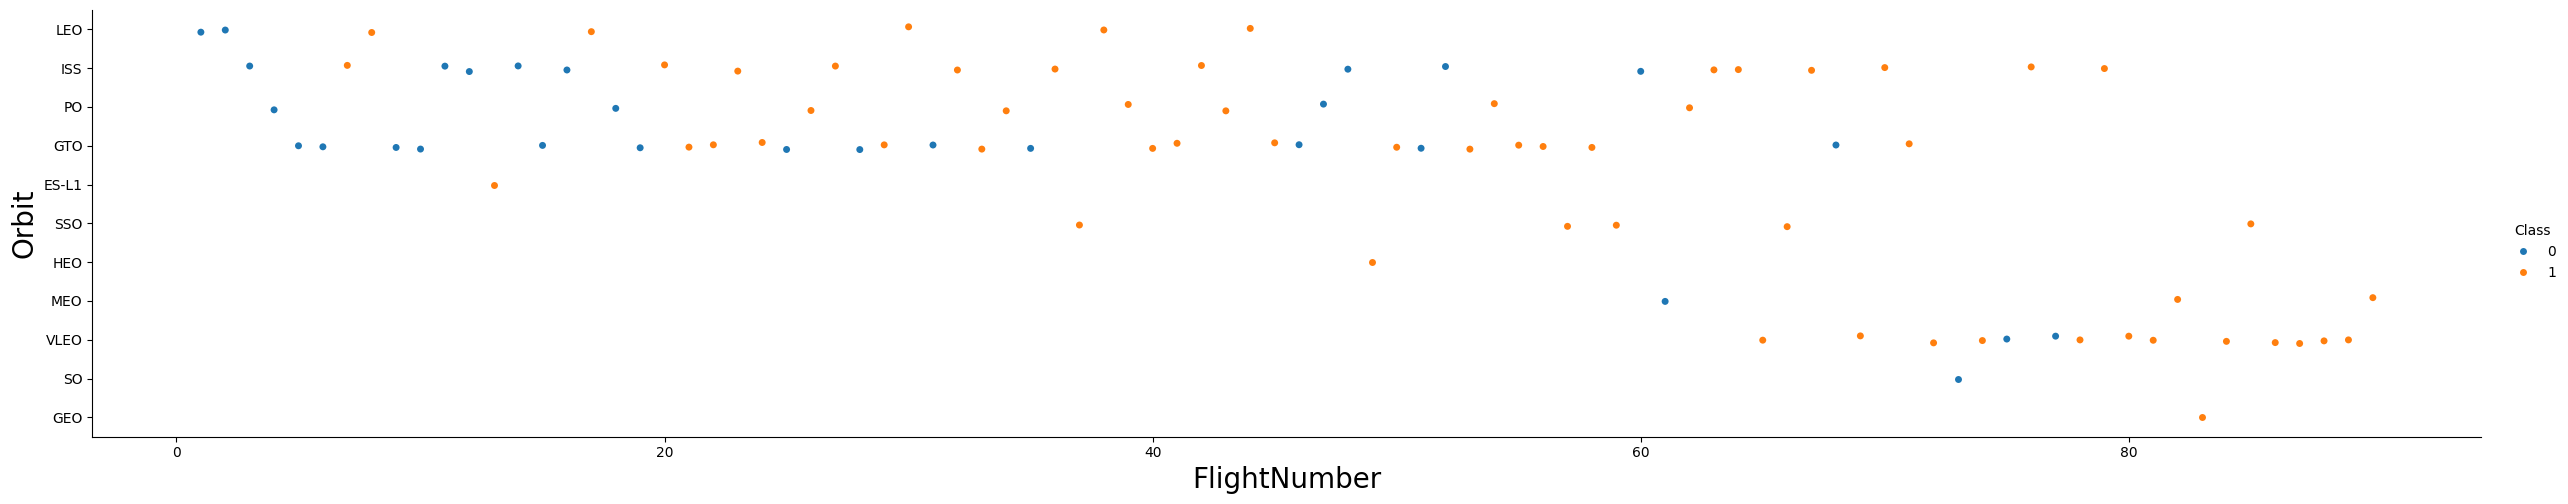

In [19]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("FlightNumber",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

In the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### 6. Relationship between Payload and Orbit type

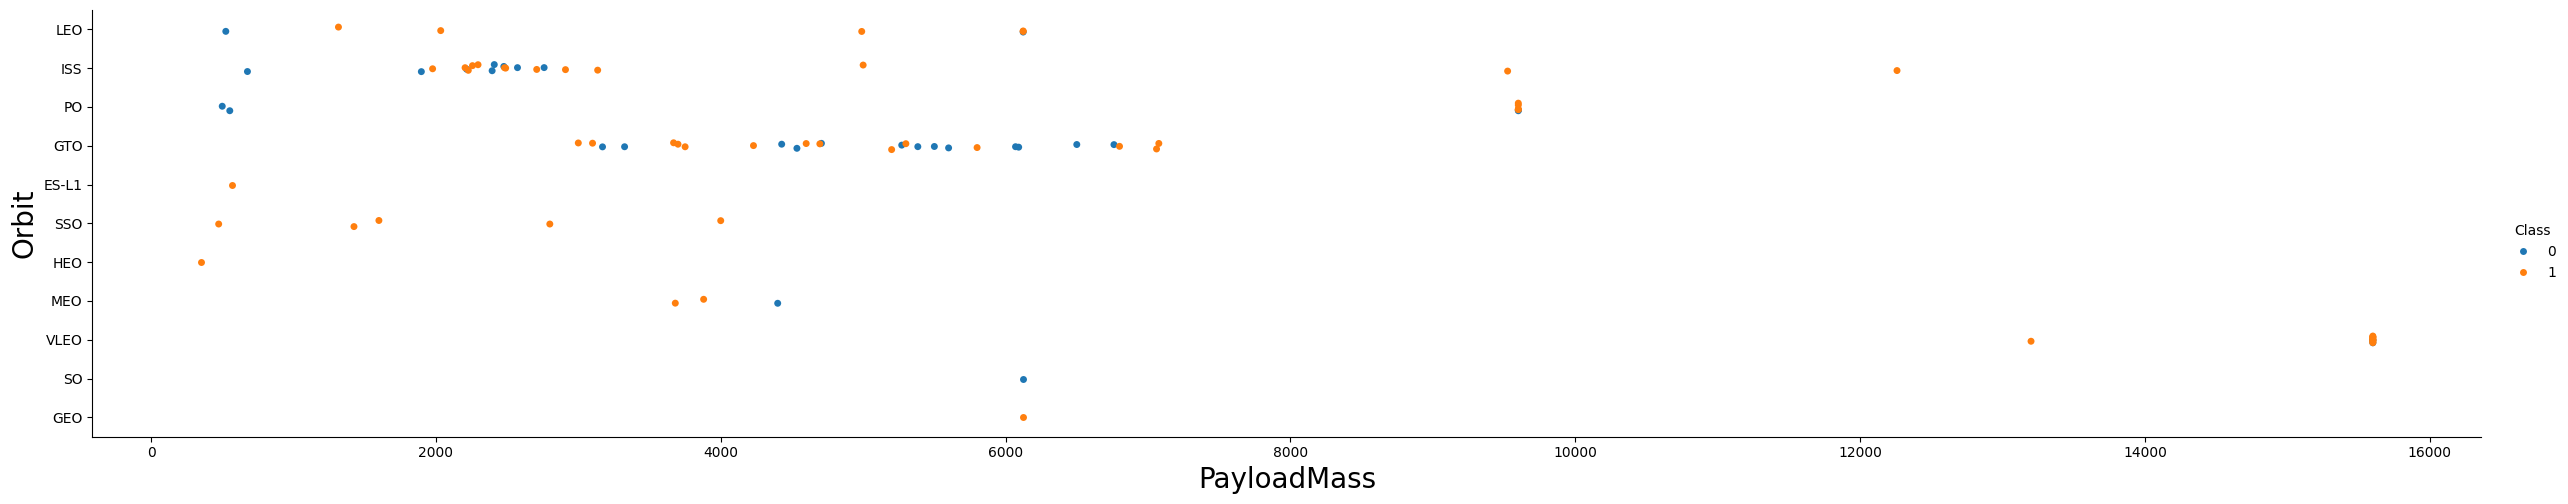

In [20]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("PayloadMass",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

Heavy payloads have a negative influence on GTO orbits and positive on GTO and Polar LEO (ISS) orbits.

### 7. Launch success yearly trend 
* Average launch success trend.

In [22]:
# A function to Extract years from the date 
year=[]

def Extract_year(date_series):
    for date in date_series:
        # Check if the date is a valid string
        if isinstance(date, str):
            year.append(date.split("-")[0])
        else:
            # Handle missing or invalid values
            year.append(None)
    return year

Extract_year(df['Date'])

['2010',
 '2012',
 '2013',
 '2013',
 '2013',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2015',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2016',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2017',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2018',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2019',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 '2020',
 None]

<Axes: xlabel='Year'>

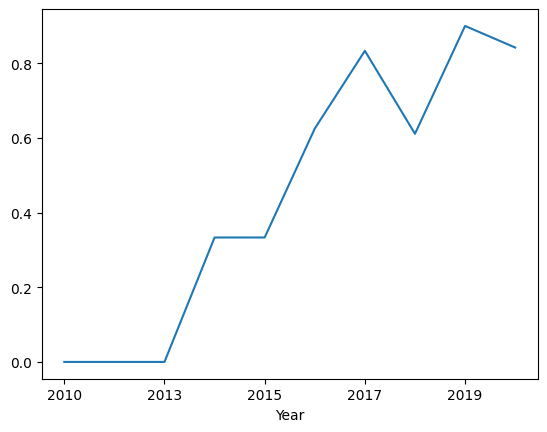

In [23]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
temp_df = df.copy()
temp_df['Year'] = year
temp_df.groupby('Year')['Class'].mean().plot()

The sucess rate since 2013 kept increasing till 2020

## 8. Features Engineering
* Preliminary insights about how each important variable would affect the success rate;
* Selection of the features that will be used in success prediction in the future module.

In [24]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1.0,6123.547647,LEO,CCSFS SLC 40,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0003
1,2.0,525.000000,LEO,CCSFS SLC 40,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0005
2,3.0,677.000000,ISS,CCSFS SLC 40,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B0007
3,4.0,500.000000,PO,VAFB SLC 4E,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1003
4,5.0,3170.000000,GTO,CCSFS SLC 40,1.0,0.0,0.0,0.0,NaN,1.0,0.0,B1004


In [25]:
pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=True)

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6123.547647,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87.0,2020-10-06,Falcon 9,15600.000000,True ASDS,3.0,1.0,1.0,1.0,5.0,...,False,False,False,False,False,False,True,False,False,False
87,88.0,2020-10-18,Falcon 9,15600.000000,True ASDS,6.0,1.0,1.0,1.0,5.0,...,False,False,False,True,False,False,False,False,False,False
88,89.0,2020-10-24,Falcon 9,15600.000000,True ASDS,3.0,1.0,1.0,1.0,5.0,...,False,False,False,False,False,False,False,False,True,False
89,90.0,2020-11-05,Falcon 9,3681.000000,True ASDS,1.0,1.0,0.0,1.0,5.0,...,False,False,False,False,False,False,False,False,False,True


### 9. Dummy variables creation to categorical columns

In [26]:
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite','LandingPad', 'Serial'], drop_first=False)
features_one_hot.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,2010-06-04,Falcon 9,6123.547647,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,0.0,0.0,0.0,1.0,...,False,False,False,False,False,False,False,False,False,False


### 10. Casting all numeric columns to float64

In [27]:
features_one_hot = features_one_hot.astype('float64', errors='ignore')

In [28]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [29]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Author 
[Helena Pedro](https://www.linkedin.com/in/helena-mbeua-pedro/) is a Data Scientist at Millennium Atlantic Bank in Angola. She is a Creative big thinker passionated about using data and optimization tools to direct decision making and solve complex and large-scale challenges.
- **Email:** mbeua94@gmail.com


© 2024 